# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Vikesh | Patel | Vikesh | 3 | 25% |
| Member 2: | Chunsheng | Xiao | ChunshengXiao | 3 | 25% |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | Ray | Pan | Ray Pan 2024-11-25 | 3 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [5]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [11]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [12]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [14]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [15]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scaling
    ('classifier', SVC())          # Step 2: Classifier
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [16]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__C', 'classifier__break_ties', 'classifier__cache_size', 'classifier__class_weight', 'classifier__coef0', 'classifier__decision_function_shape', 'classifier__degree', 'classifier__gamma', 'classifier__kernel', 'classifier__max_iter', 'classifier__probability', 'classifier__random_state', 'classifier__shrinking', 'classifier__tol', 'classifier__verbose'])

In [17]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],      # Test with different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],                # Range of C values
    'classifier__gamma': [0.001, 0.01, 0.1, 1],              # Range of gamma values
    'classifier__kernel': ['rbf']                             # Use RBF kernel only
}

In [18]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [21]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [22]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
# Make predictions on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = grid.predict(X_test)


# Print accuracy for the test set
print(f"Accuracy for X_test: {accuracy_score(y_test, y_pred):.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred,))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy for X_test: 0.96
Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The various metrics by which the model is evaluated on the dataset are the cross-validation score, accuracy, precision, recall, and F1-score. A high value of the cross-validation score reflects a good bias versus variance trade-off. However, a lower test score than this might imply overfitting. A test accuracy somewhat close to this will hint at a good fit. More insight into probable improvements or hyperparameter tuning can be further obtained from the confusion matrix and classification report.

2.  To this end, the intervals of C and gamma are very broad to cover several orders of magnitude and avoid under-fitting and overfitting by changing the regularization strength. These intervals are good to start the tuning with, and if optimal parameters are found near edges, one should expand these intervals to get a better model.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
print("First two rows of X2:")
print(X2.head(2))

First two rows of X2:
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predict and calculate accuracy for test_set1
y1_pred = grid.predict(X1)
print("test_set1 score: {:.2f}".format(accuracy_score(y1, y1_pred)))
# Predict and calculate accuracy for test_set2
y2_pred = grid.predict(X2)
print("test_set2 score: {:.2f}".format(accuracy_score(y2, y2_pred)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
print("\nConfusion Matrix for test_set1:")
print(confusion_matrix(y1, y1_pred))
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred, zero_division=0))


Confusion Matrix for test_set1:
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("\nConfusion Matrix for test_set2:")
print(confusion_matrix(y2, y2_pred))
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))


Confusion Matrix for test_set2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. Based on the metrics, we found that the model performs well in train dataset and dataset 1. However, its prediction on dataset2 shows a significant drop in accuracy. The model's performance on these three datasets can reveal insights into its generalization. High accuracy and balanced metrics suggest a good fit on familiar data. A significant drop in accuracy on independent test sets indicates overfitting. This discrepancy is an example of dataset shift or domain adaptation challenge, where the training and testing data come from slightly different distributions, causing the model to struggle on new, unseen data.

2. The model might misclassify samples because of shifts in feature distributions, changes either in the environment or sensor, and class imbalance issues in newer data. Each one easily leads to the misclassification of samples it has not seen and poor performances for underrepresented classes. Improvement may be sought via domain adaptation, addition of diverse data, and robust feature selection.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [80]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [81]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [82]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [83]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [84]:
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [85]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [86]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [87]:
# TODO - Display confusion matrix and print classification reports
y_pred = grid.predict(X_test)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classsification report:")
print(classification_report(y_test, y_pred, zero_division=0))

Confusion matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]
Classsification report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The confusion matrix, precision, recall, and f1-score of the first model are higher than the that of the second model. This means the first model better fit these two evaluations. The drop of accuracy on turn is the most significant in the second model. This means that the ability of the second model to predict turn is the least based on these two evaluations.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [88]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
y1 = test_set1['motion_state']
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [89]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [90]:
# TODO - Print test score accuracies for test_set1 and test_set2
y1_pred = grid.predict(X1)
print("test_set1 accuracy score: {:.2f}".format(accuracy_score(y1, y1_pred)))
y2_pred = grid.predict(X2)
print("test_set2 accuracy score: {:.2f}".format(accuracy_score(y2, y2_pred)))


test_set1 accuracy score: 0.83
test_set2 accuracy score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [91]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print("Confusion matrix:")
print(confusion_matrix(y1, y1_pred))
print("Classification report:")
print(classification_report(y1, y1_pred, zero_division=0))

Confusion matrix:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]
Classification report:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [92]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("Confusion matrix:")
print(confusion_matrix(y2, y2_pred))
print("Classification report:")
print(classification_report(y2, y2_pred, zero_division=0))

Confusion matrix:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]
Classification report:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.The metrics on the training/validation set and that on the testing sets show that this model fits well in both training validation dataset and the unseen testing dataset. It performs very well on detecting rest and good on straight motion. However, the detection on turning motion is the weakest.

2.Model in section 1 performs well in training/validation dataset but there's a significant drop on performance on testing dataset. This means the model is over-fitting. Model in section 2 performs well on all training/validation and testing datasets. This means the model fit the case. In conclusion, model in section 2 has a better performance than model in section 1.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   The features selected are: ax_sum, ax_var, ay_sum, ay_var, a_sum, gz_sum, and gz_var.
The reason they are chosen is that the model using ax_var, ay_var, a_sum, and gz_var as input features show good performance on classifying different vehicle's motions. In the meanwhile, ax_sum, ay_sum, and gz_var are correlated to accerlate, deaccelerate, and turning.

In [93]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_sum', 'ax_var', 'ay_sum', 'ay_var', 'a_sum', 'gz_sum', 'gz_var']]
X.head(2)

,ax_sum,ax_var,ay_sum,ay_var,a_sum,gz_sum,gz_var
0,-0.003929,8.046094e-07,-0.093081,1.319665e-07,9.797418,-0.001391,7.446916e-10
1,-0.000966,1.032619e-06,-0.092417,1.073067e-07,9.798815,-0.001943,6.983481e-10


In [94]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [95]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# hyperparameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [96]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [97]:
# TODO - Display confusion matrix and print classification report

In [98]:
y_pred = grid.predict(X_test)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred, zero_division=0))

Confusion matrix:
[[152   3   0]
 [  6 197   4]
 [  0   4  95]]
Classification report:
              precision    recall  f1-score   support

        rest       0.96      0.98      0.97       155
    straight       0.97      0.95      0.96       207
        turn       0.96      0.96      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [99]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [100]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [101]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Perform any missing imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

In [103]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'model__n_estimators': [300, 400, 500],  #Tree count
    'model__max_depth': [None, 10, 20, 30],  #Depth
}

In [104]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__n_estimators': [300, 400, 500]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [105]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'model__max_depth': 10, 'model__n_estimators': 500}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.85
Test-set score: 0.86


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion matrix:
[[103   1   0]
 [  4 120  13]
 [  0  25  41]]


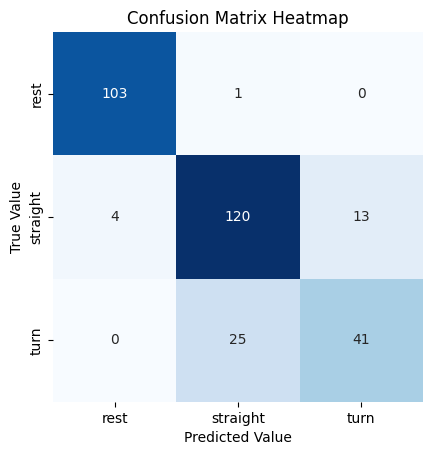

Classification report:
              precision    recall  f1-score   support

        rest       0.96      0.99      0.98       104
    straight       0.82      0.88      0.85       137
        turn       0.76      0.62      0.68        66

    accuracy                           0.86       307
   macro avg       0.85      0.83      0.84       307
weighted avg       0.86      0.86      0.86       307



In [106]:
# TODO - Display confusion matrix and print classification report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = grid.predict(X_test)
print("Confusion matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],
            yticklabels=['rest', 'straight', 'turn'],
            square=True, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("Classification report:")
print(classification_report(y_test, y_pred, zero_division=0))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [107]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [108]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [109]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_set1_score = grid.score(X1, y1)
test_set2_score = grid.score(X2, y2)
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.85
test_set2 score: 0.69


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion matrix of test_set1:
[[227   4   0]
 [  5 357  49]
 [  0  57  84]]


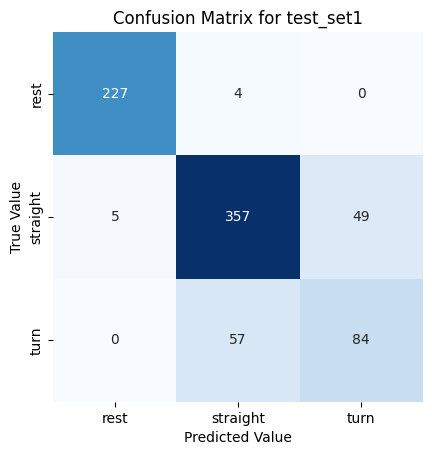

Classification report:
              precision    recall  f1-score   support

        rest       0.98      0.98      0.98       231
    straight       0.85      0.87      0.86       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.85       783
   macro avg       0.82      0.82      0.82       783
weighted avg       0.85      0.85      0.85       783



In [110]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

print("Confusion matrix of test_set1:")
conf_mat = confusion_matrix(y1, y1_pred)
print(conf_mat1)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],
            yticklabels=['rest', 'straight', 'turn'],
            square=True, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification report:")
print(classification_report(y1, y1_pred, zero_division=0))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion matrix of test_set2:
[[  1  15   0]
 [  0 132  74]
 [  0   4  71]]


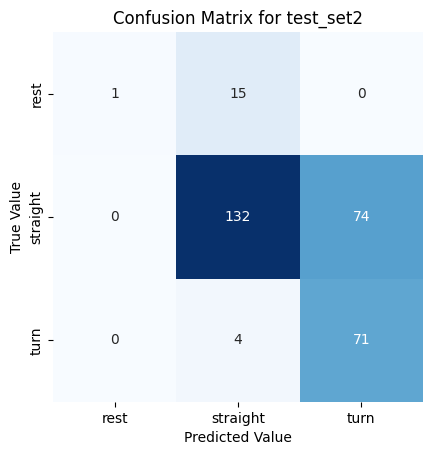

Classification report:
              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.87      0.64      0.74       206
        turn       0.49      0.95      0.65        75

    accuracy                           0.69       297
   macro avg       0.79      0.55      0.50       297
weighted avg       0.78      0.69      0.68       297



In [111]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

print("Confusion matrix of test_set2:")
conf_mat = confusion_matrix(y2, y2_pred)
print(conf_mat2)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],
            yticklabels=['rest', 'straight', 'turn'],
            square=True, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for test_set2')
plt.show()

print("Classification report:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
**1. Overall Model Performance:**
  
*  On test_set1, Random Forest achieved a slightly higher accuracy (85%) compared to SVC (83%).
*  On test_set2, both models performed equally with an accuracy of 69%, indicating challenges in generalizing to this dataset.

**2. Class-Level Prediction Differences:**

* Random Forest showed more consistent predictions for "straight" and "turn" across both datasets, with stable precision and recall.
* SVC achieved very high precision for "rest," but its recall was extremely low (e.g., only 0.06 on test_set2), indicating difficulties in detecting rare samples.

**3. Causes of Discrepancies:**
*  Random Forest's ensemble learning mechanism better captures nonlinear features and interactions, giving it a slight edge in balancing class predictions.
*  SVC's sensitivity to data distribution and potential imbalance likely caused performance drops for certain classes (e.g., "turn").


____